In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import json
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

from categorical import one_hot_encode_categorical
from feature_nlp import nlp
from feature_numerical import process_numerical_columns
from location_preprocessing import get_locations_features
from feature_date import cyclical_encode_dates
from parse_amenities import parse_amenities

In [3]:
df = pd.read_csv("Airbnb_Data.csv")
print(df.shape)
df.set_index('id', inplace=True)
df.head()

(74111, 29)


,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df_amenities_count = parse_amenities(df)
print(df_amenities_count.shape)
df_amenities_count.head()

(74111, 1)


,amenities_count
id,
6901257,-1.242623
6304928,-0.375379
7919400,0.202783
13418779,-0.375379
3808709,-0.809001


In [5]:
df_categorical = one_hot_encode_categorical(df)
print(df_categorical.shape)
df_categorical.head()

/Users/chrystalquek/opt/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/chrystalquek/opt/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chrystalquek/opt/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/chrystalquek/opt/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(74111, 8)


,property_type,room_type,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
id,,,,,,,,
6901257,-0.895236,0.084208,-0.442722,-0.038795,1,1,1,0
6304928,-0.895236,0.084208,-0.442722,-0.038795,1,1,0,1
7919400,-0.521245,-0.618787,0.454673,0.709744,1,1,1,1
13418779,-0.008698,0.176991,1.109309,-0.919058,1,1,1,0
3808709,-0.521245,-0.618787,0.454673,0.709744,1,1,1,1


In [6]:
df_nlp = nlp(df)
print(df_nlp.shape)
df_nlp.head()

(74111, 30)


,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,keywords_combined,description_polarity,description_subjectivity
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,-1.242623,"brownstone, brooklyn, beautiful, stunning, bridge",0.750000,0.937500
6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,-0.375379,"times, place, square, centrally, located",0.297500,0.512083
7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,0.202783,"unit, backyard, lighting, total, entire",0.274085,0.512857
13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,-0.375379,"haight, super, away, trendy, street",0.301186,0.553205
3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,4,40.0,NaN,20009,0.0,1.0,-0.809001,"tons, metro, diverse, different, columbia",0.239881,0.495833


In [7]:
df_numerical = process_numerical_columns(df)
print(df_numerical.shape)
df_numerical.head()

/Users/chrystalquek/opt/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/chrystalquek/opt/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chrystalquek/opt/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/chrystalquek/opt/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chrystalquek/opt/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer w

(74111, 11)


,accommodates,number_of_reviews,beds_per_bedroom,beds,bedrooms,bed_and_bathrooms,bathrooms,host_response_rate,host_response_rate_normalized,review_scores_rating,review_scores_rating_normalized
id,,,,,,,,,,,
6901257,3,2,0.500000,1.0,1.0,0.003673,1.0,94.351967,0.000000,100.000000,0.058284
6304928,7,6,0.750000,3.0,3.0,0.003673,1.0,100.000000,0.398271,93.000000,0.055619
7919400,5,10,1.500000,3.0,1.0,0.003673,1.0,100.000000,0.398271,92.000000,0.055222
13418779,4,0,0.666667,2.0,2.0,0.003673,1.0,94.351967,0.000000,95.273438,0.056505
3808709,2,4,1.000000,1.0,0.0,0.003673,1.0,100.000000,0.398271,40.000000,0.024828


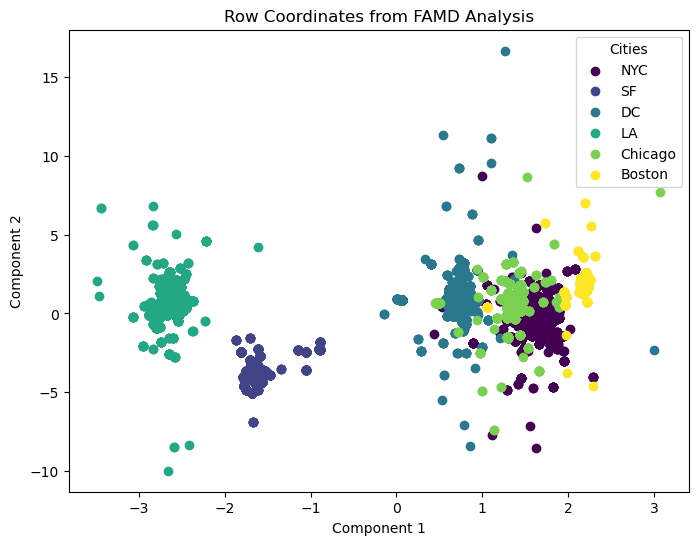

(74111, 3)


,location_component_0,location_component_1,city
id,,,
6901257,1.705783,-0.294103,NYC
6304928,1.660870,-0.234041,NYC
7919400,1.677362,-0.270865,NYC
13418779,-1.683706,-5.062434,SF
3808709,0.756076,0.332060,DC


In [8]:
df_locations  =  get_locations_features(df)
print(df_locations.shape)
df_locations.head()

In [9]:
df_datetime = cyclical_encode_dates(df)
print(df_datetime.shape)
df_datetime.head()

Missing rows in first_review: 15864
Missing rows in host_since: 188
Missing rows in last_review: 15827
(74111, 3)


/Users/chrystalquek/Documents/LastSemBestSem/DataScienceAssignments/dsw-project/feature_date.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors='coerce')  # Coerce errors will turn problematic parsing into NaT
/Users/chrystalquek/Documents/LastSemBestSem/DataScienceAssignments/dsw-project/feature_date.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors='coerce')  # Coerce errors will turn problematic parsing into NaT
/Users

,first_review_days_since,host_since_days_since,last_review_days_since
id,,,
6901257,-0.353755,1.282186,1.166963e+00
6304928,-1.292354,-1.610406,-9.352288e-01
7919400,-1.071908,-1.251671,-8.914331e-01
13418779,0.000000,-0.411593,2.212884e-15
3808709,0.562118,-0.337424,2.521201e-01


In [10]:
all_data_df = pd.concat([
    df['log_price'],
    df_categorical[[
        'property_type',
        'room_type',
        'bed_type', 
        'cancellation_policy']],
    df_nlp[['description_polarity', 'description_subjectivity']],
        df_numerical[['accommodates', 'beds_per_bedroom',
                  'bed_and_bathrooms', 'review_scores_rating_normalized', 'number_of_reviews']],
    df_locations[['location_component_0', 'location_component_1']],
    df_datetime
                         
                         ], axis=1)
print(all_data_df.shape)
all_data_df.head()

(74111, 17)


,log_price,property_type,room_type,bed_type,cancellation_policy,description_polarity,description_subjectivity,accommodates,beds_per_bedroom,bed_and_bathrooms,review_scores_rating_normalized,number_of_reviews,location_component_0,location_component_1,first_review_days_since,host_since_days_since,last_review_days_since
id,,,,,,,,,,,,,,,,,
6901257,5.010635,-0.895236,0.084208,-0.442722,-0.038795,0.750000,0.937500,3,0.500000,0.003673,0.058284,2,1.705783,-0.294103,-0.353755,1.282186,1.166963e+00
6304928,5.129899,-0.895236,0.084208,-0.442722,-0.038795,0.297500,0.512083,7,0.750000,0.003673,0.055619,6,1.660870,-0.234041,-1.292354,-1.610406,-9.352288e-01
7919400,4.976734,-0.521245,-0.618787,0.454673,0.709744,0.274085,0.512857,5,1.500000,0.003673,0.055222,10,1.677362,-0.270865,-1.071908,-1.251671,-8.914331e-01
13418779,6.620073,-0.008698,0.176991,1.109309,-0.919058,0.301186,0.553205,4,0.666667,0.003673,0.056505,0,-1.683706,-5.062434,0.000000,-0.411593,2.212884e-15
3808709,4.744932,-0.521245,-0.618787,0.454673,0.709744,0.239881,0.495833,2,1.000000,0.003673,0.024828,4,0.756076,0.332060,0.562118,-0.337424,2.521201e-01


In [11]:
# Features and target
X = all_data_df.drop(['log_price'], axis=1).copy()
y = df['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# Define parameter grid
param_grid = {
    'n_neighbors': range(12, 17),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN Regressor
knn_regressor = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE) of Best Model: {mse:.2f}')
print(f'R^2 Score of Best Model: {r2:.2f}')

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Mean Squared Error (MSE) of Best Model: 0.24
R^2 Score of Best Model: 0.53


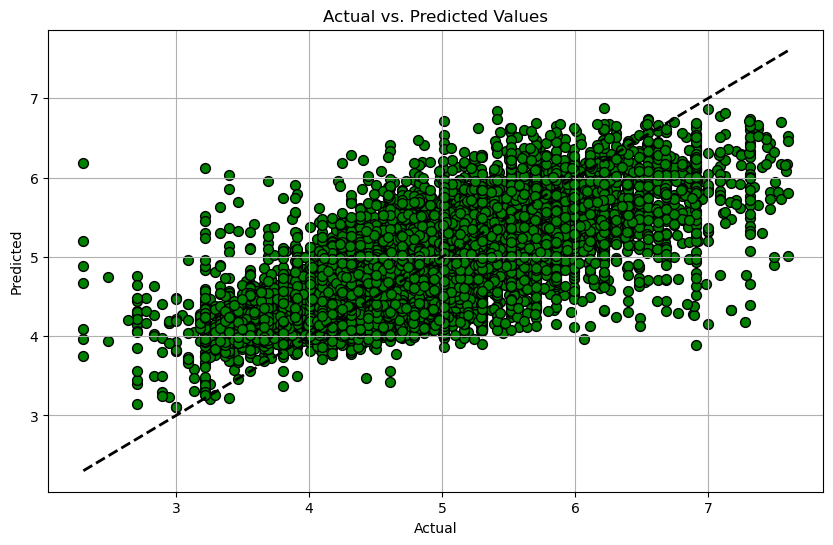

In [13]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', edgecolor='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()